# 🌕 Boulder Detection on Sample Moon Image
This notebook demonstrates a basic algorithm to detect boulders from a Moon surface image using OpenCV.

In [2]:
# 📦 Step 1: Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# New Section

In [3]:
# 📁 Step 2: Upload your Moon image file (sample_moon_image.jpg)
from google.colab import files
uploaded = files.upload()  # Select sample_moon_image.jpg here


Saving moon.jpeg to moon.jpeg


TypeError: Image data of dtype object cannot be converted to float

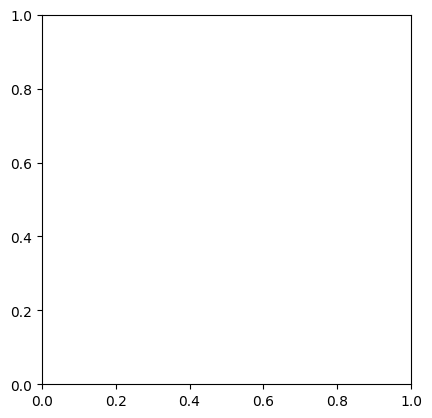

In [4]:
# 📸 Step 3: Load and display the image
img = cv2.imread("sample_moon_image.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Original Moon Image")
plt.axis("off")
plt.show()


In [ ]:
# 🧠 Step 4: Preprocess image and detect boulders using contours
# Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Threshold the image
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw detected boulders
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
boulder_count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if 50 < area < 2000:  # Filter out very small or very large areas
        (x, y), radius = cv2.minEnclosingCircle(cnt)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(output, center, radius, (0, 255, 0), 1)
        cv2.putText(output, f"{radius*2:.0f}px", (center[0]+5, center[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,0,0), 1)
        boulder_count += 1

print(f"Total boulders detected: {boulder_count}")


In [ ]:
# 🖼️ Step 5: Display final output
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Boulders")
plt.axis("off")
plt.show()
